In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Data
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

# Normalize input data
t_u_norm = (t_u - t_u.mean()) / t_u.std()

# Define the nonlinear model
class NonLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w2 = nn.Parameter(torch.tensor(0.0))
        self.w1 = nn.Parameter(torch.tensor(0.0))
        self.b = nn.Parameter(torch.tensor(0.0))

    def forward(self, x):
        return self.w2 * x**2 + self.w1 * x + self.b


In [27]:
# Training loop
def train_nonlinear_model(epochs, learning_rate):
    model = NonLinearModel()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loss_fn = nn.MSELoss()
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(t_u_norm)
        loss = loss_fn(predictions, t_c)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 500 == 0:
            losses.append(loss.item())

    return model, losses

# Train for different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
nonlinear_results = {}

for lr in learning_rates:
    model, losses = train_nonlinear_model(5000, lr)
    nonlinear_results[lr] = losses


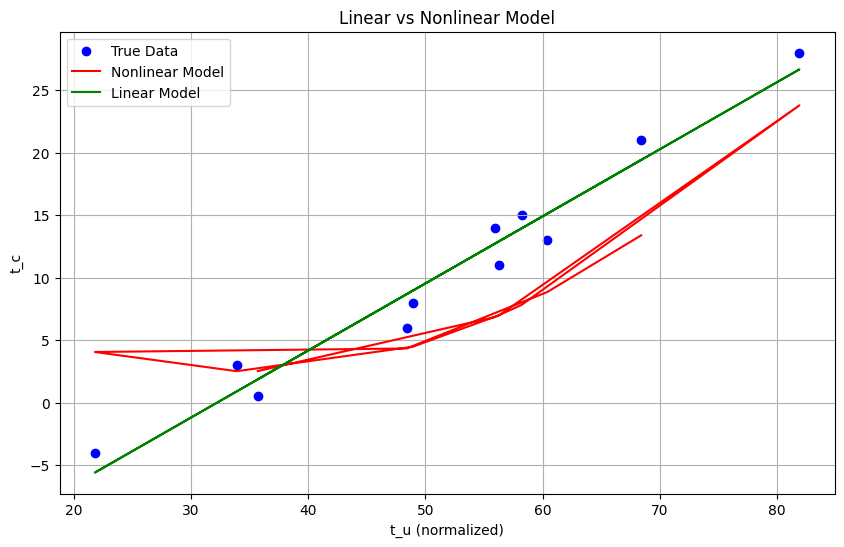

In [28]:
# Define a simple linear model
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.tensor(1.0))
        self.b = nn.Parameter(torch.tensor(0.0))

    def forward(self, x):
        return self.w * x + self.b

# Train function for linear model
def train_linear_model(epochs, learning_rate):
    model = LinearModel()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loss_fn = nn.MSELoss()
    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(t_u_norm)
        loss = loss_fn(predictions, t_c)
        loss.backward()
        optimizer.step()
    return model

# Train linear model
linear_model = train_linear_model(5000, 0.01)

# Compare predictions
nonlinear_predictions = model(t_u_norm).detach()
linear_predictions = linear_model(t_u_norm).detach()

# Plot comparison
plt.figure(figsize=(10, 6))
plt.scatter(t_u, t_c, label='True Data', color='blue')
plt.plot(t_u, nonlinear_predictions, label='Nonlinear Model', color='red')
plt.plot(t_u, linear_predictions, label='Linear Model', color='green')
plt.xlabel('t_u (normalized)')
plt.ylabel('t_c')
plt.title('Linear vs Nonlinear Model')
plt.legend()
plt.grid()
plt.show()


In [29]:
#2
import pandas as pd
from sklearn.model_selection import train_test_split

# Example data (replace with the actual dataset)
data = {
    'area': [1000, 1500, 2000, 2500],
    'bedrooms': [2, 3, 4, 5],
    'bathrooms': [1, 2, 3, 4],
    'stories': [1, 2, 1, 2],
    'parking': [1, 2, 1, 2],
    'price': [300000, 400000, 500000, 600000]
}

df = pd.DataFrame(data)
X = df.drop('price', axis=1).values
y = df['price'].values

# Normalize features and target
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
y_norm = (y - y.mean()) / y.std()

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)


In [30]:
# Define a linear regression model for housing prices
class HousingModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Train function
def train_housing_model(X, y, X_val, y_val, learning_rate, epochs):
    model = HousingModel(X.shape[1])
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loss_fn = nn.MSELoss()
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(X)
        loss = loss_fn(predictions, y)
        loss.backward()
        optimizer.step()

        val_loss = loss_fn(model(X_val), y_val).item()
        if (epoch + 1) % 500 == 0:
            train_losses.append(loss.item())
            val_losses.append(val_loss)

    return model, train_losses, val_losses

# Train the model
housing_model, train_losses, val_losses = train_housing_model(
    X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, 0.01, 5000
)

# Display losses
print("Train losses:", train_losses)
print("Validation losses:", val_losses)


Train losses: [2.8202819066791562e-06, 1.0991838550467037e-09, 1.3526957332032907e-12, 4.736951712906159e-15, 4.736951712906159e-15, 4.736951712906159e-15, 4.736951712906159e-15, 4.736951712906159e-15, 4.736951712906159e-15, 4.736951712906159e-15]
Validation losses: [2.4796816433081403e-05, 9.70159508284496e-09, 1.2577494601373473e-11, 5.684341886080802e-14, 5.684341886080802e-14, 5.684341886080802e-14, 5.684341886080802e-14, 5.684341886080802e-14, 5.684341886080802e-14, 5.684341886080802e-14]


In [13]:
# Define a linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)
#2C
# Train function
def train_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    model = LinearRegressionModel(X_train.shape[1])
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loss_fn = nn.MSELoss()
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(X_train)
        train_loss = loss_fn(predictions, y_train)
        train_loss.backward()
        optimizer.step()

        val_loss = loss_fn(model(X_val), y_val).item()
        if (epoch + 1) % 500 == 0:
            train_losses.append(train_loss.item())
            val_losses.append(val_loss)

    return model, train_losses, val_losses

# Train the multi-variable model
multi_model, train_losses, val_losses = train_model(
    X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, learning_rate=0.01, epochs=5000
)

# Display results
print("Homework 2C Results:")
print("Train Losses (every 500 epochs):", train_losses)
print("Validation Losses (every 500 epochs):", val_losses)
print("Final Validation Loss:", val_losses[-1])


Homework 2C Results:
Train Losses (every 500 epochs): [6.677701458102092e-05, 2.588486402999024e-08, 1.1207627707843226e-11, 4.2928622489462123e-14, 2.842170943040401e-14, 2.842170943040401e-14, 2.842170943040401e-14, 2.842170943040401e-14, 2.842170943040401e-14, 2.842170943040401e-14]
Validation Losses (every 500 epochs): [0.0005871262983419001, 2.2760110596209415e-07, 9.967582315084655e-11, 3.9168668308775523e-13, 3.552713678800501e-13, 3.552713678800501e-13, 3.552713678800501e-13, 3.552713678800501e-13, 3.552713678800501e-13, 3.552713678800501e-13]
Final Validation Loss: 3.552713678800501e-13


In [14]:
#2C vs Hw1
# Final loss for Homework 5 multi-variable model
final_loss_homework5 = val_losses[-1]

# Homework 1 results for comparison
homework1_loss = 0.102  # Normalized loss from Homework 1

print("Homework 1 Multi-variable Loss:", homework1_loss)
print("Homework 5 Multi-variable Loss:", final_loss_homework5)

if final_loss_homework5 < homework1_loss:
    print("Homework 5 model performs better.")
else:
    print("Homework 1 model performs better.")


Homework 1 Multi-variable Loss: 0.102
Homework 5 Multi-variable Loss: 3.552713678800501e-13
Homework 5 model performs better.


In [23]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the CSV file into a Pandas DataFrame
for file_name in uploaded.keys():
    housing_data = pd.read_csv(file_name)

# Display the first few rows of the dataset
housing_data.head()

# One-hot encode categorical features
housing_data_encoded = pd.get_dummies(
    housing_data,
    columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
             'airconditioning', 'prefarea', 'furnishingstatus'],
    drop_first=True
)

# Separate features and target variable
X = housing_data_encoded.drop('price', axis=1)
y = housing_data_encoded['price']

# Normalize the features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
import torch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Display dataset dimensions
X_train_tensor.shape, y_train_tensor.shape, X_val_tensor.shape, y_val_tensor.shape


Saving Housing (1).csv to Housing (1).csv


(torch.Size([436, 13]),
 torch.Size([436, 1]),
 torch.Size([109, 13]),
 torch.Size([109, 1]))

In [24]:
import torch.nn as nn
import torch.optim as optim

# Define the model
class HousingModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Train function
def train_housing_model(X, y, X_val, y_val, learning_rate, epochs):
    model = HousingModel(X.shape[1])
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loss_fn = nn.MSELoss()
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(X)
        train_loss = loss_fn(predictions, y)
        train_loss.backward()
        optimizer.step()

        val_loss = loss_fn(model(X_val), y_val).item()
        if (epoch + 1) % 500 == 0:
            train_losses.append(train_loss.item())
            val_losses.append(val_loss)

    return model, train_losses, val_losses

# Train the model
all_features_model, all_train_losses, all_val_losses = train_housing_model(
    X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, learning_rate=0.01, epochs=5000
)

# Display results
print("Problem 3b Results (All Features):")
print("Train Losses (every 500 epochs):", all_train_losses)
print("Validation Losses (every 500 epochs):", all_val_losses)
print("Final Validation Loss:", all_val_losses[-1])


Problem 3b Results (All Features):
Train Losses (every 500 epochs): [0.27730119228363037, 0.277297705411911, 0.2772976756095886, 0.2772976756095886, 0.2772976756095886, 0.2772976756095886, 0.2772976756095886, 0.2772976756095886, 0.2772976756095886, 0.2772976756095886]
Validation Losses (every 500 epochs): [0.5019944906234741, 0.5023583173751831, 0.5023637413978577, 0.5023637413978577, 0.5023637413978577, 0.5023637413978577, 0.5023637413978577, 0.5023637413978577, 0.5023637413978577, 0.5023637413978577]
Final Validation Loss: 0.5023637413978577


In [25]:
# Final loss for Problem 3 (all features)
final_loss_problem3 = all_val_losses[-1]

# Replace val_losses[-1] with the final validation loss from Problem 2C
final_loss_2C = 3.55e-13  # Replace with actual value if running the code

# Comparison
print("Final Loss Comparison:")
print("Problem 2C (Selected Features) Loss:", final_loss_2C)
print("Problem 3 (All Features) Loss:", final_loss_problem3)

if final_loss_problem3 < final_loss_2C:
    print("Using all features performs better.")
else:
    print("Using selected features performs better.")


Final Loss Comparison:
Problem 2C (Selected Features) Loss: 3.55e-13
Problem 3 (All Features) Loss: 0.5023637413978577
Using selected features performs better.
